In [1]:
import sys
import os
current_dir = os.path.dirname(os.path.abspath(''))
parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(current_dir)))
sys.path.append(parent_dir)
import streamProps
import math

class Format:
    end = '\033[0m'
    underline = '\033[4m'

In [2]:
print(Format.underline + "COLD STREAMS" + Format.end + "(from ASPEN HYSYS)")
cold1_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 110.999991856599, 1.1000*1e5, 2315.572061/3600, "R12")
cold1_In.printState()
cold1_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 118.399996544637, 1.0500*1e5, cold1_In.M, "R13")
cold1_Out.printState()

cold2_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 102.33977, 7.594800*1e5, 49190.802051/3600, "R25")
cold2_In.printState()
cold2_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 111.218525718605, 7.494800*1e5, cold2_In.M, "R26")
cold2_Out.printState()

print(Format.underline + "HOT STREAMS" + Format.end + "(from ASPEN HYSYS)")
mainH2_In = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 113.9999997, 19.7780*1e5, 5208.00/3600, "F03")
mainH2_In.x_para = 0.25
print("F03 p-H2 mole fraction: " + str(round(mainH2_In.x_para,3)))
mainH2_In.printState()
mainH2_Out = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 106.00, 19.730*1e5, mainH2_In.M, "F04")
mainH2_Out.printState()

hot_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 119.400, 29.700*1e5, 51506.37411/3600, "R02")
hot_In.printState()
hot_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 112.000, 29.60*1e5, hot_In.M, "R03")
hot_Out.printState()

COLD STREAMS(from ASPEN HYSYS)
Stream R12
M [kg/s]    =  0.6432
P [bar]     =  1.1
T [Kelvin]  =  111.0
H [kJ/kg]   =  1429.742
S [kJ/kg.K] =  40.055


Stream R13
M [kg/s]    =  0.6432
P [bar]     =  1.05
T [Kelvin]  =  118.4
H [kJ/kg]   =  1516.03
S [kJ/kg.K] =  40.999


Stream R25
M [kg/s]    =  13.6641
P [bar]     =  7.595
T [Kelvin]  =  102.34
H [kJ/kg]   =  1321.752
S [kJ/kg.K] =  31.072


Stream R26
M [kg/s]    =  13.6641
P [bar]     =  7.495
T [Kelvin]  =  111.22
H [kJ/kg]   =  1424.875
S [kJ/kg.K] =  32.093


HOT STREAMS(from ASPEN HYSYS)
F03 p-H2 mole fraction: 0.25
Stream F03
M [kg/s]    =  1.4467
P [bar]     =  19.778
T [Kelvin]  =  114.0
H [kJ/kg]   =  1911.929
S [kJ/kg.K] =  36.892


Stream F04
M [kg/s]    =  1.4467
P [bar]     =  19.73
T [Kelvin]  =  106.0
H [kJ/kg]   =  1799.713
S [kJ/kg.K] =  35.881


Stream R02
M [kg/s]    =  14.3073
P [bar]     =  29.7
T [Kelvin]  =  119.4
H [kJ/kg]   =  1501.755
S [kJ/kg.K] =  27.056


Stream R03
M [kg/s]    =  14.3073
P [bar]     = 

In [3]:
from scipy.optimize import minimize_scalar

def objective_function(x):
    return abs(cold1_In.M*(cold1_In.H-cold1_Out.H) + x*(cold2_In.H-cold2_Out.H) + hot_In.M*(hot_In.H-hot_Out.H))

res = minimize_scalar(objective_function)
massFlow2A = res.x

cold2A_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, massFlow2A, "R25A")
cold2A_In.printState()
cold2B_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, cold2_In.M-massFlow2A, "R25B")
cold2B_In.printState()

Stream R25A
M [kg/s]    =  12.0905
P [bar]     =  7.595
T [Kelvin]  =  102.34
H [kJ/kg]   =  1321.752
S [kJ/kg.K] =  31.072


Stream R25B
M [kg/s]    =  1.5736
P [bar]     =  7.595
T [Kelvin]  =  102.34
H [kJ/kg]   =  1321.752
S [kJ/kg.K] =  31.072




In [4]:
lengthPFHX = 1.5996
widthPFHX = 1.5000
heightPFHX = 1.6309
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

print(Format.underline + "Overall PFHX Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

lengthHXA     = 1.4510
widthHXA      = 1.5000
heightHXA     = 1.4645
volumeHXA     = lengthHXA*widthHXA*heightHXA

print(Format.underline + "HXA Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthHXA)
print("Width  [m]  = ", widthHXA)
print("Height [m]  = ", heightHXA)
print("Volume [m3] = ", round(volumeHXA,3))
print("\n")

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)

print(Format.underline + "HXB Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))
print("\n")

Overall PFHX Geometry
(based on ASPEN EDR)
Length [m]  =  1.5996
Width  [m]  =  1.5
Height [m]  =  1.6309
Volume [m3] =  3.913


HXA Geometry
(based on ASPEN EDR)
Length [m]  =  1.451
Width  [m]  =  1.5
Height [m]  =  1.4645
Volume [m3] =  3.187


HXB Geometry
Length [m]  =  1.5996
Width  [m]  =  1.5
Height [m]  =  0.302
Volume [m3] =  0.726




HX-B Geometry
Length [m]  =  1.5996
Width  [m]  =  1.5
Height [m]  =  0.302
Volume [m3] =  0.726

###### Running Simulation ######
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.78e-06       0.00e+00          50              0       
Solved in 1 iterations, number of nodes 50. 
Maximum relative residual: 1.78e-06 
Maximum boundary residual: 0.00e+00


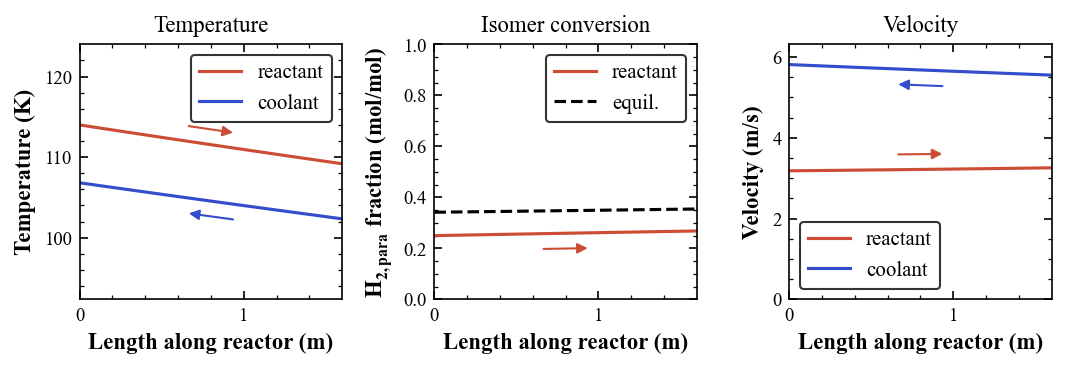

In [5]:
# test for verifying model

### CONFIGURATION ###
configuration = {
    'reactant': {
        'mass_flow_rate': mainH2_In.M*86.4, # tonne-per-day
        'x_para': mainH2_In.x_para,         # para-hydrogen fraction at inlet
        'temperature': mainH2_In.T,         # inlet temperature (K)
        'pressure': mainH2_In.P/1000        # inlet pressure (kPa)
    },
    'coolant': {
        'fluid': "Hydrogen",          # type of coolant
        'x_para': 0.25,               # normal hydrogen
        'mass_flow_rate': cold2B_In.M*86.4,  # tonne-per-day
        'temperature':  cold2B_In.T,        # temperature of coolant at inlet (K)
        'pressure': cold2B_In.P/1000        # pressure of coolant at inlet (kPa)
    },
    'reactor': {
        'length': lengthHXB,                # m
        'width': widthHXB,                 # m
        'height': heightHXB,                # m
        'fin_thickness': 0.2e-3,      # m
        'fin_height': 8.9e-3,         # m
        'fin_pitch': 1.27e-3,         # m
        'seration_length': 3.0e-3,    # m
        'parting_sheet_thickness': 1.5e-3 # m
    },
    'catalyst': {
        'solid_fraction': 0.31,       # volumetric fraction of catlayst particles within reactor
        'diameter': 424.0e-6,         # mean particle diameter
        'density': 4.0                # solid density of catalyst particles (g/cm3)
    },
    'simulation': {
        'nodes': 50,                  # number of nodes across reactor length to setup
        'tolerance': 1.0e-4,          # tolerance of bvp solver
        'delta_t': 1.0                # initial guess of temperature difference between streams
    }
}

# import packages
import matplotlib
from hydrogen_pfhx import model, outputs

print(Format.underline + "HX-B Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))

# run the model with config
print('\n###### Running Simulation ######')
results = model.model(configuration)

# plot & display results!
outputs.plot_results(results)
matplotlib.pyplot.draw()
matplotlib.pyplot.savefig('HX-3_init.png')

Final HX-3 Geometry
Length [m]  =  4.0
Width  [m]  =  1.5
Height [m]  =  3.0
Volume [m3] =  18.0


HX-B Geometry
Length [m]  =  4.0
Width  [m]  =  1.5
Height [m]  =  2.469
Volume [m3] =  14.813

###### Running Simulation ######
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          3.93e-06       0.00e+00          50              0       
Solved in 1 iterations, number of nodes 50. 
Maximum relative residual: 3.93e-06 
Maximum boundary residual: 0.00e+00


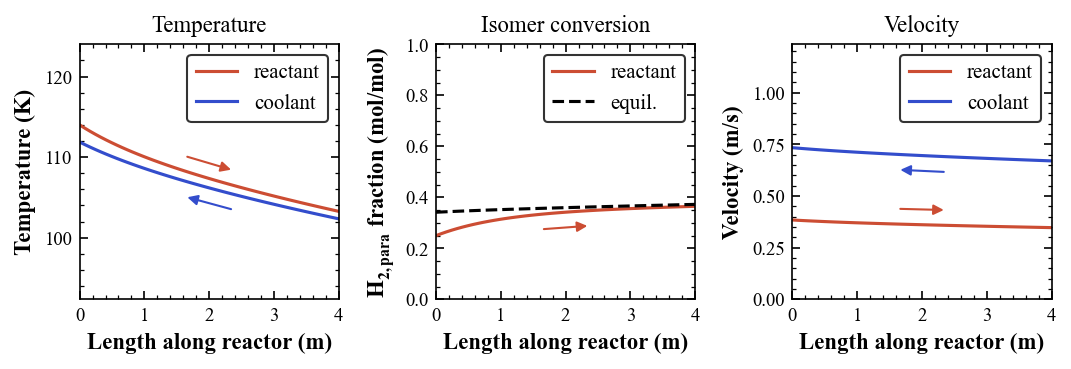

In [11]:
#Adjusted geometry
lengthPFHX = 4.0
widthPFHX  = 1.5
heightPFHX = 3.0
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)

# test for verifying model

### CONFIGURATION ###
configuration = {
    'reactant': {
        'mass_flow_rate': mainH2_In.M*86.4, # tonne-per-day
        'x_para': mainH2_In.x_para,         # para-hydrogen fraction at inlet
        'temperature': mainH2_In.T,         # inlet temperature (K)
        'pressure': mainH2_In.P/1000        # inlet pressure (kPa)
    },
    'coolant': {
        'fluid': "Hydrogen",          # type of coolant
        'x_para': 0.25,               # normal hydrogen
        'mass_flow_rate': cold2B_In.M*86.4,  # tonne-per-day
        'temperature':  cold2B_In.T,        # temperature of coolant at inlet (K)
        'pressure': cold2B_In.P/1000        # pressure of coolant at inlet (kPa)
    },
    'reactor': {
        'length': lengthHXB,                # m
        'width': widthHXB,                 # m
        'height': heightHXB,                # m
        'fin_thickness': 0.2e-3,      # m
        'fin_height': 8.9e-3,         # m
        'fin_pitch': 1.27e-3,         # m
        'seration_length': 3.0e-3,    # m
        'parting_sheet_thickness': 1.5e-3 # m
    },
    'catalyst': {
        'solid_fraction': 0.31,       # volumetric fraction of catlayst particles within reactor
        'diameter': 424.0e-6,         # mean particle diameter
        'density': 4.0                # solid density of catalyst particles (g/cm3)
    },
    'simulation': {
        'nodes': 50,                  # number of nodes across reactor length to setup
        'tolerance': 1.0e-4,          # tolerance of bvp solver
        'delta_t': 1.0                # initial guess of temperature difference between streams
    }
}

# import packages
import matplotlib
from hydrogen_pfhx import model, outputs

print(Format.underline + "Final HX-3 Geometry" + Format.end)
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

print(Format.underline + "HX-B Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))

# run the model with config
print('\n###### Running Simulation ######')
results = model.model(configuration)

# plot & display results!
outputs.plot_results(results)
matplotlib.pyplot.draw()
matplotlib.pyplot.savefig('HX-3_final.png')

In [12]:
print(results)

       Z (m)  Reactant pressure (kPa)  Coolant pressure (kPa)  \
0   0.000000              1977.800000              759.340674   
1   0.081633              1977.681276              759.343723   
2   0.163265              1977.563032              759.346759   
3   0.244898              1977.445244              759.349783   
4   0.326531              1977.327890              759.352796   
5   0.408163              1977.210950              759.355797   
6   0.489796              1977.094405              759.358788   
7   0.571429              1976.978240              759.361769   
8   0.653061              1976.862440              759.364739   
9   0.734694              1976.746989              759.367699   
10  0.816327              1976.631877              759.370650   
11  0.897959              1976.517090              759.373592   
12  0.979592              1976.402619              759.376525   
13  1.061224              1976.288454              759.379449   
14  1.142857             